<a href="https://colab.research.google.com/github/soham-chitnis10/SAiDL-Spring-Assignment-2022/blob/main/CoreML/CoreML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pymc3 as pm
import theano.tensor as T
import theano
import sklearn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
def generate_data(n=200):
  X = np.random.rand(n,2)
  y = np.zeros((n,))
  for i in range(n):
    x1 = X[i,0].item()
    x2 = X[i,1].item()
    y[i] = round(x1) ^ round(x2)
  return X,y

In [16]:
X,y=generate_data(7000)
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True)

In [18]:
ann_input = theano.shared(X_train)
ann_output = theano.shared(y_train)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w_1_out, w_in_1]


Sampling 2 chains for 2_000 tune and 50_000 draw iterations (4_000 + 100_000 draws total) took 3964 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


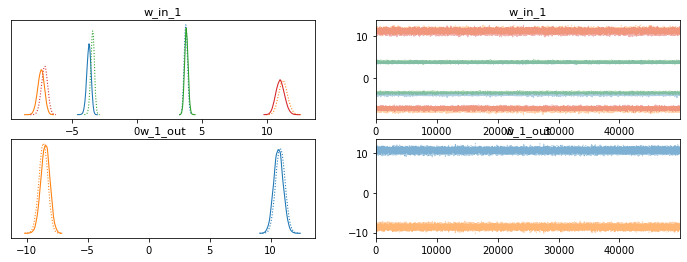

In [20]:
with pm.Model() as model:
  init_1 = np.random.rand(X.shape[1],2)
  init_2 = np.random.randn(2)
  weights_in_1 = pm.Normal('w_in_1', 0, sd=1, shape=(X.shape[1], 2), 
                             testval=init_1)
  weights_1_out = pm.Normal('w_1_out', 0, sd=1, shape=(2,), 
                              testval=init_2)
  a1 = T.dot(ann_input, weights_in_1)
  act_1 = T.nnet.sigmoid(a1)
  act_out = T.dot(act_1, weights_1_out)
  out = pm.Bernoulli('out', 
                       T.nnet.sigmoid(act_out),
                       observed=ann_output)
    
  # step = pm.Metropolis()
  trace = pm.sample(50000,tune =2000,return_inferencedata=False)

  pm.plot_trace(trace);

In [26]:
ann_input.set_value(X_test)
ann_output.set_value(y_test)

ppc = pm.sample_posterior_predictive(trace,model=model,samples=5000)
pred = ppc['out'].mean(axis=0) >= 0.5
print('Accuracy = {}%'.format((y_test == pred).mean() * 100))

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Accuracy = 77.77142857142857%


Text(0.5, 1.0, 'Predicted labels in testing set')

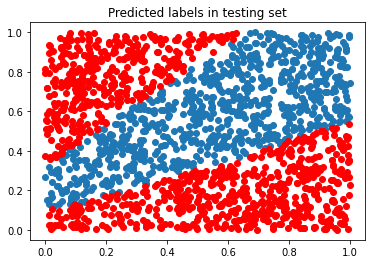

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
plt.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
plt.title('Predicted labels in testing set')

Text(0.5, 1.0, 'Actual labels in testing set')

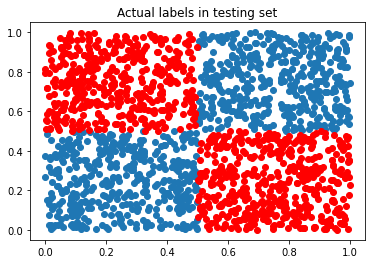

In [29]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1])
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='r')
plt.title('Actual labels in testing set')